In [69]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [70]:
import warnings

warnings.filterwarnings('ignore')

In [71]:
ds = pd.read_csv('train.csv')

In [72]:
columns = ds.columns
columns

Index(['is_profit', 'sym', 'datetime', 'rsi14', 'sma9_var', 'sma180_var',
       'vwap_var', 'spread14_e', 'volume14_34_var', 'prev_close_var',
       'prev_floor_var', 'prev_ceil_var', 'prev1_candle_score',
       'prev2_candle_score', 'prev3_candle_score', 'mins_from_start',
       'valley_interval_mins', 'valley_close_score', 'valley_rsi_score',
       'day_open_var', 'open_from_prev_close_var', 'ceil_var', 'floor_var'],
      dtype='object')

In [110]:
columns_log = ['spread14_e', 'valley_interval_mins', 'valley_close_score', 'valley_rsi_score']

In [73]:
columns_other = [col for col in ds.columns if col not in (columns_log and columns[3:])]

In [74]:
columns_other

['is_profit', 'sym', 'datetime']

In [75]:
ds.sort_values(by=['datetime'], inplace=True)

In [76]:
date = ds.datetime.values

In [77]:
date

array(['2020-06-29 09:38:00', '2020-06-29 09:41:00',
       '2020-06-29 09:41:00', ..., '2021-01-22 14:29:00',
       '2021-01-22 14:29:00', '2021-01-22 14:29:00'], dtype=object)

### ------- add columns "day of week" -----------------

In [78]:
import datetime
import calendar

In [79]:
def split_to_columns_date(data):
    
    year_month_day = [d.split()[0] for d in data]
    d_time = [d.split()[1] for d in data]
    
    year = []
    month = []
    day = []
    hour = []
    minutes = []
    weekday = []
    
    year = [int(d.split('-')[0]) for d in year_month_day]
    month = [int(d.split('-')[1]) for d in year_month_day]
    day = [int(d.split('-')[2]) for d in year_month_day]
    hour = [int(d.split(':')[0]) for d in d_time]
    minutes = [int(d.split(':')[1]) for d in d_time]    
    weekday = [datetime.datetime(d[0], d[1], d[2]).weekday() for d in zip(year, month, day)]    
            
    df_date = pd.DataFrame({'year': year, 'month': month, 'day': day, 'hour': hour, 
                            'minutes': minutes, 'weekday': weekday})
    
    return df_date

In [80]:
df_date = split_to_columns_date(date)

In [81]:
df_date.shape, ds.shape

((258729, 6), (258729, 23))

In [82]:
df_date

,year,month,day,hour,minutes,weekday
0,2020,6,29,9,38,0
1,2020,6,29,9,41,0
2,2020,6,29,9,41,0
3,2020,6,29,9,42,0
4,2020,6,29,9,42,0
...,...,...,...,...,...,...
258724,2021,1,22,14,29,4
258725,2021,1,22,14,29,4
258726,2021,1,22,14,29,4
258727,2021,1,22,14,29,4


In [83]:
df_1 = pd.concat([df_date, ds.drop(['datetime', 'sym'], axis=1)], axis=1)

In [84]:
df_1

,year,month,day,hour,minutes,weekday,is_profit,rsi14,sma9_var,sma180_var,...,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,2020,6,29,9,38,0,True,30.509761,-0.006223,-0.022679,...,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,2020,6,29,9,41,0,True,46.452741,-0.001062,-0.004721,...,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,2020,6,29,9,41,0,True,34.336224,-0.004443,-0.016648,...,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,2020,6,29,9,42,0,False,36.584676,-0.001006,0.005697,...,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,2020,6,29,9,42,0,True,29.113480,-0.000950,0.002626,...,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258724,2021,1,22,14,29,4,False,32.602899,-0.002293,-0.033872,...,0.000000,-0.000590,85.0,19.0,0.118066,7.540690,-0.021400,-0.008601,-0.030373,0.000000
258725,2021,1,22,14,29,4,False,37.355860,-0.002370,-0.021928,...,0.001488,0.000209,247.0,46.0,0.563293,10.917935,-0.030075,-0.008601,-0.038968,0.000000
258726,2021,1,22,14,29,4,True,41.550637,-0.001991,-0.014774,...,0.000000,0.003775,285.0,20.0,0.077993,1.535276,0.070815,-0.012065,-0.037562,0.070815
258727,2021,1,22,14,29,4,False,35.433061,-0.005427,-0.012600,...,-0.001341,0.002687,146.0,12.0,0.235696,4.331218,0.003386,0.001356,-0.033909,0.003386


In [85]:
target = ds.is_profit

### -------------- encoding categorical --------------------

In [86]:
from pandas import get_dummies

In [87]:
columns_numeric = df_1.columns[7:]
columns_numeric

Index(['rsi14', 'sma9_var', 'sma180_var', 'vwap_var', 'spread14_e',
       'volume14_34_var', 'prev_close_var', 'prev_floor_var', 'prev_ceil_var',
       'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score',
       'mins_from_start', 'valley_interval_mins', 'valley_close_score',
       'valley_rsi_score', 'day_open_var', 'open_from_prev_close_var',
       'ceil_var', 'floor_var'],
      dtype='object')

In [88]:
columns_categorical = [col for col in df_1.columns if col not in columns_numeric]
columns_categorical

['year', 'month', 'day', 'hour', 'minutes', 'weekday', 'is_profit']

In [89]:
df_to_model = df_1.copy(deep=True)
df_to_model.drop(['year', 'month', 'day', 'hour', 'minutes'], axis=1, inplace=True)

In [90]:
df_to_model.head(3)

,weekday,is_profit,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,...,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,0,True,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,...,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,0,True,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,...,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,0,True,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,...,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000


In [91]:
df_to_model = pd.get_dummies(data=df_to_model, columns=['weekday'], drop_first=True)

In [92]:
df_to_model

,is_profit,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,...,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var,weekday_1,weekday_2,weekday_3,weekday_4
0,True,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,...,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802,0,0,0,0
1,True,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,...,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148,0,0,0,0
2,True,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,...,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000,0,0,0,0
3,False,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,...,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596,0,0,0,0
4,True,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,...,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258724,False,32.602899,-0.002293,-0.033872,-0.011582,0.001114,0.462271,-0.029817,-0.028145,-0.060000,...,0.118066,7.540690,-0.021400,-0.008601,-0.030373,0.000000,0,0,0,1
258725,False,37.355860,-0.002370,-0.021928,-0.015194,0.000470,-0.238875,-0.038417,-0.036760,-0.068333,...,0.563293,10.917935,-0.030075,-0.008601,-0.038968,0.000000,0,0,0,1
258726,True,41.550637,-0.001991,-0.014774,-0.003803,0.000993,-0.062510,0.057895,0.105147,0.050330,...,0.077993,1.535276,0.070815,-0.012065,-0.037562,0.070815,0,0,0,1
258727,False,35.433061,-0.005427,-0.012600,-0.015767,0.001918,0.046143,0.004747,0.015770,-0.095270,...,0.235696,4.331218,0.003386,0.001356,-0.033909,0.003386,0,0,0,1


In [93]:
df_to_model.is_profit = [1 if v == True else 0 for v in df_1.is_profit]

In [94]:
df_to_model

,is_profit,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,...,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var,weekday_1,weekday_2,weekday_3,weekday_4
0,1,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,...,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802,0,0,0,0
1,1,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,...,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148,0,0,0,0
2,1,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,...,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000,0,0,0,0
3,0,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,...,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596,0,0,0,0
4,1,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,...,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258724,0,32.602899,-0.002293,-0.033872,-0.011582,0.001114,0.462271,-0.029817,-0.028145,-0.060000,...,0.118066,7.540690,-0.021400,-0.008601,-0.030373,0.000000,0,0,0,1
258725,0,37.355860,-0.002370,-0.021928,-0.015194,0.000470,-0.238875,-0.038417,-0.036760,-0.068333,...,0.563293,10.917935,-0.030075,-0.008601,-0.038968,0.000000,0,0,0,1
258726,1,41.550637,-0.001991,-0.014774,-0.003803,0.000993,-0.062510,0.057895,0.105147,0.050330,...,0.077993,1.535276,0.070815,-0.012065,-0.037562,0.070815,0,0,0,1
258727,0,35.433061,-0.005427,-0.012600,-0.015767,0.001918,0.046143,0.004747,0.015770,-0.095270,...,0.235696,4.331218,0.003386,0.001356,-0.033909,0.003386,0,0,0,1


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, f1_score, roc_curve, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [96]:
def print_metrics(true, pred):
    print('accuracy: {}'.format(accuracy_score(true, pred)))
    print('MSE: {}'.format(mean_squared_error(true, pred)))   
    print('MAE: {}'.format(mean_absolute_error(true, pred)))
    print('f1 score: {}'.format(f1_score(true, pred)))
    print('precision score: {}'.format(precision_score(true, pred)))
    print('recall score: {}'.format(recall_score(true, pred)))

In [97]:
def plot_roc_auc(true, pred, title=''):
    
    fpr, tpr, threshold  = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.title('{} ROC {:4f}'.format(title, roc_auc))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Rositive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [98]:
def feature_importance(columns, coef):
    featureImportance = pd.DataFrame({'feature': columns, 'importance': coef})
    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(['importance'], ascending=False, inplace=True)
    
    return featureImportance

### -------------- train test --------

25% -> test

In [99]:
size_train = int(df_to_model.shape[0] * 0.75)
size_train

194046

In [100]:
X_train = df_to_model.drop(['is_profit'], axis=1)[:size_train]

In [101]:
X_test = df_to_model.drop(['is_profit'], axis=1)[size_train:]

In [102]:
X_test.shape[0] + X_train.shape[0], df_1.shape[0]

(258729, 258729)

In [103]:
y_train = df_to_model.is_profit[:size_train]
y_test = df_to_model.is_profit[size_train:]

In [104]:
y_train.shape[0] + y_test.shape[0], df_1.shape[0]

(258729, 258729)

In [105]:
X_train

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,...,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var,weekday_1,weekday_2,weekday_3,weekday_4
0,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,-0.002925,...,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802,0,0,0,0
1,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,0.000000,...,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148,0,0,0,0
2,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,0.000000,...,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000,0,0,0,0
3,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,-0.000105,...,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596,0,0,0,0
4,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,-0.000375,...,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194041,21.486170,-0.001881,-0.014162,-0.004351,0.000794,0.267789,-0.015411,-0.010810,-0.032118,-0.000455,...,0.244148,7.441592,-0.011701,-0.003755,-0.011701,0.000000,0,0,1,0
194042,34.024885,-0.001286,-0.013692,-0.004297,0.000691,-0.690471,-0.015692,-0.011092,-0.032393,0.000114,...,0.028461,12.538715,-0.011982,-0.003755,-0.011982,0.000000,0,0,1,0
194043,36.922094,-0.000637,0.002347,0.003911,0.000256,-0.141849,-0.004371,0.000282,-0.021265,-0.000113,...,0.022506,1.982720,-0.000619,-0.003755,-0.004539,0.011501,0,0,1,0
194044,30.723702,-0.000742,-0.005206,-0.002342,0.000247,-0.239876,-0.010424,-0.005799,-0.027215,-0.000113,...,0.067909,11.129818,-0.006694,-0.003755,-0.010590,0.005352,0,0,1,0


In [149]:
(X_test.isnull().sum()).sum(), (X_train.isnull().sum()).sum()

(0, 0)

### ----------------Scaler----------------------

In [150]:
scaler =StandardScaler()

In [151]:
X_train[columns_numeric] = scaler.fit_transform(X_train[columns_numeric])

In [152]:
X_train

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,...,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var,weekday_1,weekday_2,weekday_3,weekday_4
0,-0.727596,-1.550022,-0.724910,-0.805771,-0.348142,0.122402,-0.860813,-0.582778,-0.484702,-1.829512,...,0.547641,-0.895897,-0.872479,-0.305116,-0.537552,-0.440533,0,0,0,0
1,2.187302,0.693038,0.487623,0.186694,-0.248432,1.045231,-0.687052,-0.431830,-0.342381,0.339358,...,1.142128,1.640766,-0.641029,-0.305116,-0.256468,0.028325,0,0,0,0
2,-0.027994,-0.776630,-0.317709,-0.710949,-0.486068,1.059880,0.775193,0.448052,0.427613,0.339358,...,0.207108,-0.347157,0.386351,0.708767,-0.324147,-0.510858,0,0,0,0
3,0.383097,0.717148,1.191047,0.534041,-0.742252,-1.512550,0.977029,0.452531,0.874292,0.261251,...,-0.547853,-0.438001,0.723485,0.626493,0.542039,-0.195462,0,0,0,0
4,-0.982882,0.741389,0.983661,0.788010,-0.796867,0.036084,1.048354,0.787770,0.793364,0.061520,...,-0.027120,-1.061548,0.953650,0.474716,0.432582,0.495050,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194041,-2.377404,0.336902,-0.149809,0.526685,-0.115514,1.005128,-0.130317,-0.529888,-0.059324,0.001994,...,0.029356,0.766162,0.038764,-0.236524,0.708005,-0.510858,0,0,1,0
194042,-0.084917,0.595640,-0.118097,0.532211,-0.253083,-2.079089,-0.139782,-0.537946,-0.067027,0.423759,...,-0.586945,2.033710,0.026174,-0.236524,0.692675,-0.510858,0,0,1,0
194043,0.444788,0.877345,0.964858,1.362281,-0.837068,-0.313315,0.242608,-0.212449,0.244186,0.255917,...,-0.603960,-0.591346,0.534807,-0.236524,1.098347,0.497758,0,0,1,0
194044,-0.688481,0.831957,0.454899,0.729876,-0.849770,-0.628822,0.038162,-0.386477,0.077795,0.255378,...,-0.474226,1.683347,0.262865,-0.236524,0.768530,-0.041502,0,0,1,0


### -------------- baseline --------------------

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
model_LR = LogisticRegression()

In [122]:
params = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.00001, 0.001, 0.1]}

In [123]:
gs_LR = GridSearchCV(estimator=model_LR, param_grid=params, cv=3, n_jobs=-1)

In [124]:
%%time
gs_LR.fit(X_train, y_train)

CPU times: user 3.9 s, sys: 208 ms, total: 4.1 s
Wall time: 3.79 s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.001, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [125]:
gs_LR.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [155]:
model_LR = LogisticRegression(C=0.001, penalty='l2')

In [156]:
model_LR.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [157]:
y_pred_train = model_LR.predict(X_train)

In [158]:
print_metrics(y_train, y_pred_LR)

accuracy: 0.6903002380878761
MSE: 0.30969976191212395
MAE: 0.30969976191212395
f1 score: 0.5005485189987035
precision score: 0.6541828688115048
recall score: 0.4053519268821257


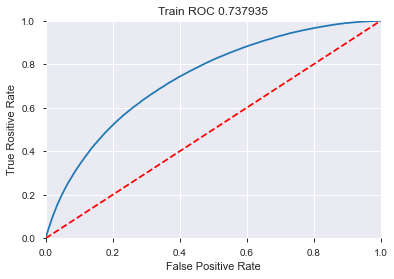

In [159]:
plot_roc_auc(y_train, model_LR.predict_proba(X_train)[:, 1], title='Train')

In [160]:
X_test[columns_numeric] = scaler.transform(X_test[columns_numeric])

In [161]:
y_pred_LR_test = model_LR.predict(X_test)

In [162]:
print_metrics(y_test, y_pred_LR_test)

accuracy: 0.7110987431009693
MSE: 0.2889012568990307
MAE: 0.2889012568990307
f1 score: 0.5111570356031078
precision score: 0.6618344397778079
recall score: 0.4163647986362668


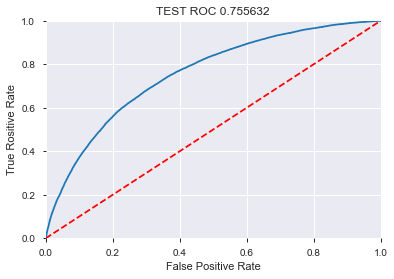

In [163]:
plot_roc_auc(y_test, model_LR.predict_proba(X_test)[:, 1], title='TEST')

In [164]:
model_LR.get_params()

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### -------------SVC--------------------

In [165]:
from sklearn.svm import SVC

In [166]:
model_svc = SVC()

In [174]:
params_grid = {'kernel': ['linear', 'rbf'], 'C': [0.0001, 0.01, 1.0, 10.0, 100.0]}

In [175]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [181]:
%%time
svr.fit(X_train_short, y_train_short)
#model_svc.fit(X_train, y_train)

CPU times: user 3min 6s, sys: 436 ms, total: 3min 6s
Wall time: 6min 45s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']})

In [182]:
svr

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']})

In [183]:
svr.best_params_

{'kernel': 'rbf'}

In [186]:
model_svc = SVC(kernel='rbf', random_state=42)

In [167]:
params_grid = {'kernel': ['linear', 'rbf', 'ply'], 'C': [0.0001, 0.01, 1.0, 10.0, 100.0], 
               "gamma": [0.001, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 5.0, 10.0, 100.0]}

In [168]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [169]:
svr

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 5.0, 10.0,
                                   100.0],
                         'kernel': ['linear', 'rbf', 'ply']})

In [190]:
%%time
svr.fit(X_train_short, y_train_short)

CPU times: user 2min 58s, sys: 424 ms, total: 2min 58s
Wall time: 27min 43s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 1, 10, 100]})

In [191]:
svr.best_params_

{'C': 1}

In [194]:
model_svc = SVC(kernel='rbf', C=1.0, random_state=42)

In [198]:
params_grid = {"gamma": [-100.0, -10.0, 1.0, 10.0, 100.0]}

In [199]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [200]:
svr

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [-100.0, -10.0, 1.0, 10.0, 100.0]})

In [201]:
%%time
svr.fit(X_train_short, y_train_short)

CPU times: user 6min 50s, sys: 408 ms, total: 6min 50s
Wall time: 16min 30s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [-100.0, -10.0, 1.0, 10.0, 100.0]})

In [202]:
svr.best_params_

{'gamma': 10.0}

In [215]:
model_svc = SVC(kernel='rbf', C=1.0, random_state=42)

params_grid = {"gamma": [1.5, 2.0, 2.5, 3.0]}

svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

svr

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [1.5, 2.0, 2.5, 3.0]})

In [216]:
%%time
svr.fit(X_train_short, y_train_short)

CPU times: user 7min 11s, sys: 544 ms, total: 7min 11s
Wall time: 21min 28s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [1.5, 2.0, 2.5, 3.0]})

In [217]:
svr.best_params_

{'gamma': 2.5}

#### model svc -> kerner = rbf , C = 1.0, gamma = 2.5

In [74]:
y_pred_train = svr.predict(X_train)

In [75]:
print_metrics(y_train, y_pred_train)

accuracy: 0.7078940045143935
MSE: 0.2921059954856065
MAE: 0.2921059954856065
f1 score: 0.5354162910020818
precision score: 0.6845226867861259
recall score: 0.4396494864788467


In [76]:
y_pred_test = svr.predict(X_test)

In [78]:
print_metrics(y_test, y_pred_test)

accuracy: 0.7132322248504244
MSE: 0.28676777514957563
MAE: 0.28676777514957563
f1 score: 0.5254189586798004
precision score: 0.6573623559539052
recall score: 0.43758789686767524


In [ ]:
plot_roc_auc(y_test, svr.predict_proba(X_test)[:, 1], title='TEST')

In [79]:
svr.best_params_

{'kernel': 'rbf'}

In [177]:
index = X_train.index

In [178]:
index_short = [i for i in index[::5]]

In [179]:
X_train_short = X_train.loc[index_short]

In [180]:
y_train_short = y_train[index_short]

In [84]:
params = {'C': [0.001, 0.1, 1, 10, 100]}

In [85]:
model_svc = SVC(kernel='rbf')

In [101]:
gsv = GridSearchCV(estimator=model_svc, param_grid=params, cv=3, n_jobs=-1)

In [87]:
%%time
gsv.fit(X_train_short, y_train_short)

CPU times: user 2min 27s, sys: 284 ms, total: 2min 28s
Wall time: 22min 45s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]})

In [115]:
y_train_short.shape, X_train_short.shape

((64682,), (64682, 24))

In [102]:
gsv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [94]:
model_svc = SVC(kernel='rbf', C=1.0)

In [87]:
params = {'gamma': [0.001, 0.1, 1, 10, 100, 1000]}

In [95]:
gsv = GridSearchCV(estimator=model_svc, param_grid=params, cv=3, n_jobs=-1)

In [97]:
%%time
model_svc.fit(X_train_short, y_train_short)

CPU times: user 3min 3s, sys: 128 ms, total: 3min 3s
Wall time: 3min 3s


SVC()

In [96]:
gsv

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.001, 0.1, 1, 10, 100, 1000]})

In [218]:
gsv.get_params_

AttributeError: 'GridSearchCV' object has no attribute 'get_params_'

In [ ]:
y_pred = model_svc.predict(X_train)

In [ ]:
print_metrics(y_train, y_pred)

In [7]:
a = np.c_[1:5]
b = np.c_[10:50:10]

In [9]:
np.c_[a, b].var()

189.6875

In [87]:
index_short_train = np.random.choice(index_train, 20000)

NameError: name 'index_train' is not defined

In [88]:
len(index_short_train)

20000

In [89]:
X_train_short = X_train.loc[index_short_train]

In [90]:
X_train_short.sort_index(inplace=True)

In [91]:
y_train_short = y_train.loc[index_short_train]

In [92]:
y_train_short.sort_index(inplace=True)

In [93]:
np.sum(y_train_short.index == X_train_short.index)

20000

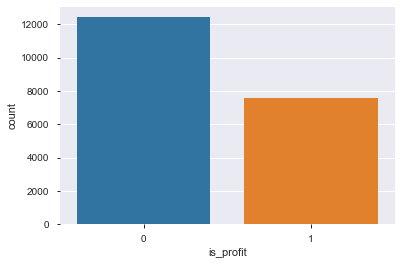

In [94]:
sns.countplot(y_train_short)

In [132]:
model_svc = SVC()

In [130]:
%%time
model_svc.fit(X_train_short, y_train_short)

CPU times: user 29.4 s, sys: 96 ms, total: 29.5 s
Wall time: 29.5 s


SVC()

In [120]:
y_pred = model_svc.predict(X_test)

In [121]:
accuracy_score(y_test, y_pred)

0.36276919747074193

In [158]:
x = ds.sort_index().index
y = range(len(x))

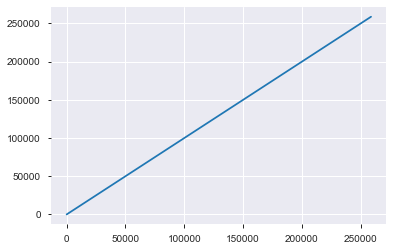

In [159]:
plt.plot(x, y);

In [164]:
index_for_short = [v for v in x[::10]]
X_train_short = ds.loc[index_for_short]

In [165]:
X_train_short

,is_profit,sym,datetime,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,...,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,True,MGNX,2020-11-02 11:13:00,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,...,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
10,True,BLNK,2020-11-02 14:11:00,45.629119,-0.001515,-0.013328,-0.015379,0.000450,0.276878,0.018084,...,0.000000,-0.001261,281.0,58.0,0.553183,15.230913,-0.024661,0.043825,-0.030637,0.003807
20,False,SMAR,2020-11-02 13:11:00,32.521222,-0.001613,-0.013340,-0.014689,0.000364,-0.076646,-0.014234,...,-0.000102,-0.000305,221.0,22.0,0.067683,2.201373,-0.014827,0.000601,-0.037581,0.000000
30,True,PS,2020-11-02 13:23:00,38.472459,-0.002767,-0.017476,-0.016722,0.001334,-0.829735,0.007643,...,0.001899,-0.001577,233.0,10.0,0.126266,6.540503,-0.002207,0.009873,-0.031231,0.004444
40,True,SHAK,2020-11-02 10:51:00,38.905403,-0.001339,-0.032060,-0.011469,0.001067,-0.075535,-0.049576,...,0.000000,0.000778,81.0,6.0,0.011531,2.949118,-0.041485,-0.008442,-0.041485,0.001914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258680,True,FULT,2021-01-22 09:40:00,35.348826,-0.005714,-0.009876,-0.003359,0.002311,0.046203,-0.003506,...,-0.001395,0.002098,10.0,9.0,0.070325,18.800343,-0.003506,0.000000,-0.008374,0.000000
258690,False,JD,2021-01-22 13:29:00,31.379597,-0.000955,-0.004431,-0.000979,0.000412,0.179564,-0.004731,...,0.000252,0.000211,239.0,10.0,0.021018,4.763803,0.005739,-0.010410,-0.009097,0.009170
258700,False,GOEV,2021-01-22 10:29:00,42.564584,-0.002300,-0.008094,-0.002215,0.001492,-0.242891,-0.009947,...,0.002952,-0.000443,59.0,10.0,0.052571,0.770240,-0.004132,-0.005840,-0.009368,0.003463
258710,False,PIPP,2021-01-22 11:28:00,40.807732,-0.002307,-0.009014,-0.010942,0.001348,-0.124533,-0.003864,...,-0.001161,0.001301,118.0,23.0,0.077514,6.924233,0.003113,-0.006955,-0.024224,0.004543


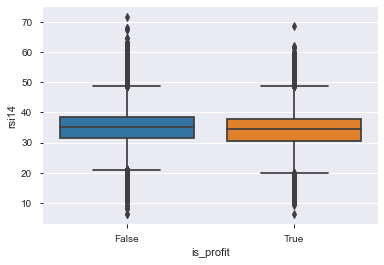

In [170]:
sns.boxplot(y='rsi14', x='is_profit', data=ds)

In [133]:
params_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1e0, 1e1, 1e2, 1e3],
              'gamma': np.logspace(-2, 2, 5)}

In [134]:
%%time
svr = GridSearchCV(model_svc, params_grid, cv=5, n_jobs=-1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 95.6 µs


In [135]:
%%time
svr.fit(X_train, y_train)

KeyboardInterrupt: 

In [136]:
svr.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred_train = svr.best_params(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)